# **Assignment 9**

In [9]:
# core
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# ml
from sklearn import datasets as ds
from sklearn import linear_model as lm
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import accuracy_score

# plotly or other graphing library

In [ ]:
# Load datasets here once and assign to variables iris and boston
iris = ds.load_iris()

**Q1**

**Data set: Iris**

* Return the first 5 rows of the data including the feature names as column headings in a DataFrame and a
separate Python list containing target names

In [ ]:
# Feature dataframe
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Target value list
y = iris.target

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


**Q2**

**Data set: Iris**

* Fit the Iris dataset into a kNN model with neighbors=5 and predict the category of observations passed in
argument new_observations. Return back the target names of each prediction (and not their encoded values,
 i.e. return setosa instead of 0).

In [ ]:
# Init KNN model
knn = KNN(5)

# Train on entire dataset
knn.fit(df.values, y)

# Predict on entire dataset - overfit
y_pred = knn.predict(df.values)

# Map names to target values
y_pred_names = iris.target_names[y_pred]  # Clever way to map
print(np.unique(y_pred_names, return_counts=True))


(array(['setosa', 'versicolor', 'virginica'], dtype='<U10'), array([50, 49, 51]))


**Q3**

**Data set: Iris**

* Split the Iris dataset into a train / test model with the split ratio between the two established by the function parameter split.

* Fit KNN with the training data with number of neighbors equal to the function parameter neighbors

* Generate and return back an accuracy score using the test data that was split out

In [29]:
X_train, X_test, y_train, y_test = tts(df.values, y, test_size=0.2)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = knn.score(X_test, y_test)
print(f"KNN Iris Classification Accuracy (k=5): {accuracy:.2%}")

KNN Iris Classification Accuracy (k=5): 93.33%


**Q4**

**Data set: Iris**

* Generate an overfitting / underfitting curve of kNN each of the testing and training accuracy performance scores series for a range of neighbor (k) values from 1 to 30 and plot the curves (number of neighbors is x-axis, performance score is y-axis on the chart).

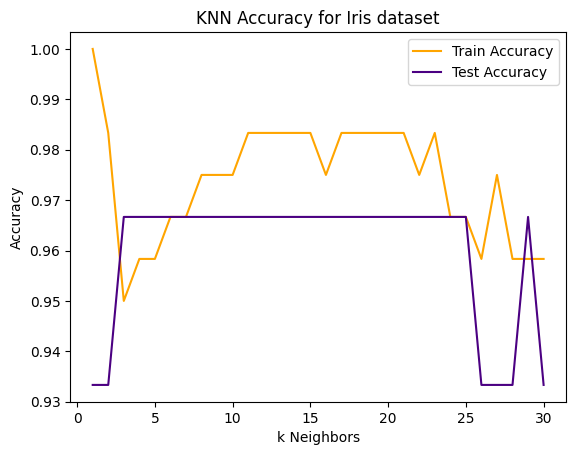

In [31]:
# Track results
neighbors = []
train_accuracy = []
test_accuracy = []

# Train, predict, accuracy loop
for k in range(1, 31):
    neighbors.append(k)
    knn = KNN(k)
    knn.fit(X_train, y_train)

    train_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test, y_test))

# Plot results
fig, ax = plt.subplots()
ax.plot(neighbors, train_accuracy, label="Train Accuracy", color="orange")
ax.plot(neighbors, test_accuracy, label="Test Accuracy", color="indigo")
ax.set_xlabel("k Neighbors")
ax.set_ylabel("Accuracy")
ax.set_title("KNN Accuracy for Iris dataset")
ax.legend();


Considering generalizable model performance, we are interested in extracting the most amount of signal from noise. In this case, we'd like to find the highest test accuracy, which appears to be a range from $k={3, 25}$. As these values all provide the same test accuracy, we'll chose the lowest value (k=3) in favor of model simplicity.